# 机器学习100天——第二天：简单线性回归
## 第一步：数据预处理

这里导入我们需要的库，值得注意的是，这里比第一天多了一个matplotlib.pyplot,matplotlib是python上的一个2D绘图库,
matplotlib下的模块pyplot是一个有命令样式的函数集合，
matplotlib.pyplot是为我们对结果进行图像化作准备的。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

导入相关数据

In [2]:
dataset = pd.read_csv('../datasets/studentscores.csv')
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


这里我们需要使用pandas的iloc(区分于loc根据index来索引，iloc利用行号来索引)方法来对数据进行处理，第一个参数为行号，:表示全部行，第二个参数 ：1表示截到第1列(也就是取第0列)

In [4]:
X = dataset.iloc[ : ,   : 1 ].values
Y = dataset.iloc[ : , 1 ].values
print("X:",X)
print("Y:",Y)

X: [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
Y: [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


导入sklearn库的cross_validation类来对数据进行训练集、测试集划分

In [5]:
from sklearn.model_selection import train_test_split
#拆分数据，0.25作为测试集
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

## 训练线性回归

In [6]:
from sklearn.linear_model import LinearRegression
#使用训练集对模型进行训练
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

## 预测结果

In [7]:
Y_pred = regressor.predict(X_test)

## 可视化

### 训练集结果可视化

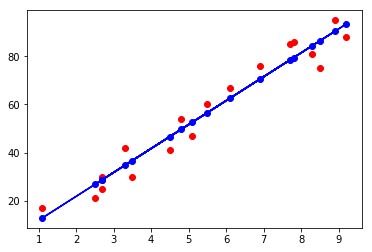

In [20]:
#散点图
plt.scatter(X_train , Y_train, color = 'red')
#线图
plt.plot(X_train , regressor.predict(X_train), 'bo-')
plt.show()

### 测试集结果可视化

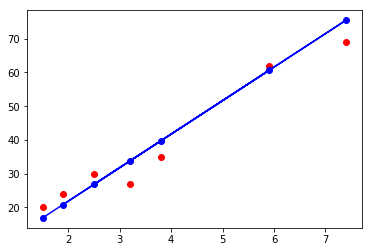

In [21]:
#散点图
plt.scatter(X_test , Y_test, color = 'red')
#线图
plt.plot(X_test ,Y_pred, 'bo-')
plt.show()